In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/MANOJ/Documents/Week7/aps_failure_training_set.csv", skiprows=19, na_values=["na"])
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
data.isnull().sum() # to check for missing values in each column
# We can exclude 'ab_000' from the dataset, out of 60000 datapoints 46329 datapoints are missing.

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [4]:
data = data.drop(['ab_000'], axis = 1)
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
# to fill all the missing values in each column with respect to their mean
for i in range(1,170):
    print(f"Filling NaN values in {[data.columns[i]]} with {data[data.columns[i]].mean()}")
    data[data.columns[i]].fillna(value = data[data.columns[i]].mean(), inplace = True)

Filling NaN values in ['aa_000'] with 59336.499566666665
Filling NaN values in ['ac_000'] with 356014263.03146565
Filling NaN values in ['ad_000'] with 190620.6393141186
Filling NaN values in ['ae_000'] with 6.8191304347826085
Filling NaN values in ['af_000'] with 11.006817391304347
Filling NaN values in ['ag_000'] with 221.63636670093882
Filling NaN values in ['ag_001'] with 975.7222606145392
Filling NaN values in ['ag_002'] with 8606.014529151005
Filling NaN values in ['ag_003'] with 88591.28109356301
Filling NaN values in ['ag_004'] with 437096.63237202715
Filling NaN values in ['ag_005'] with 1108373.8302685027
Filling NaN values in ['ag_006'] with 1657817.886227646
Filling NaN values in ['ag_007'] with 499309.80417670956
Filling NaN values in ['ag_008'] with 35569.89108193295
Filling NaN values in ['ag_009'] with 5114.75315612938
Filling NaN values in ['ah_000'] with 1809931.1761098476
Filling NaN values in ['ai_000'] with 9016.96542082835
Filling NaN values in ['aj_000'] with 114

In [6]:
data.isnull().sum() # All the missing values are filled with the corresponding mean

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [7]:
label = data['class']
data = data.drop(['class'], axis = 1)

In [8]:
data.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
data.describe()
# To scale all the values of columns to the range which is comparable so that the one feature doesn't over dominate the other features.

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.724678e+08,3.504515e+07,158.142022,205.375337,2.036363e+04,3.400875e+04,1.494791e+05,7.574598e+05,2.360968e+06,...,1.149060e+06,5.402722e+05,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,4.469894e+05,4.720424e+04,4.268529,8.627929
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.880000e+02,2.880000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.881000e+03,...,2.397270e+05,1.148530e+05,2.283220e+05,1.960600e+05,9.976600e+04,4.358700e+04,4.474000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,1.686000e+03,8.426500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.361500e+04,...,4.454897e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.833455e+05,1.732245e+05,1.387300e+05,2.366000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
col = data.columns

In [11]:
Std_scaler = StandardScaler()
df = Std_scaler.fit_transform(data.to_numpy())
df = pd.DataFrame(df, columns=col)

In [12]:
df.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119381,2.297451,-5.431343e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.169358,...,0.691902,0.522440,0.236978,0.068038,0.005736,-0.109591,-0.146551,-0.177717,-0.021220,-0.024659
1,-0.180697,-0.460883,8.304736e-19,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.177404,...,-0.020965,-0.061196,-0.131205,-0.133241,-0.187559,-0.154294,-0.092070,-0.145940,-0.021220,-0.024659
2,-0.125811,-0.460883,-5.436479e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.184438,...,-0.146305,-0.094980,-0.018715,0.014010,-0.011581,-0.109552,-0.097547,-0.166828,-0.021220,-0.024659
3,-0.407928,-0.460883,-5.437449e-03,-0.043121,-0.004902,-0.010884,-0.028691,-0.057574,-0.116540,-0.184199,...,-0.387494,-0.390696,-0.383624,-0.353355,-0.313264,-0.201514,-0.310368,-0.177717,0.915878,3.684257
4,0.010572,-0.460881,-5.426264e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.166604,...,0.153624,0.034545,-0.034806,-0.041945,-0.043365,-0.020200,0.660478,-0.151914,-0.021220,-0.024659


### OverSampling the Minority Class

In [13]:
s = SMOTE(random_state=42)
X_sampled, Y_sampled = s.fit_resample(df, label)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique in machine learning) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=42, stratify=Y_sampled)
# Results in 80% training data, 20% test data

In [15]:
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42, stratify=y_train)
# Results in 70% training data, 10% Validation data

In [16]:
Y_train.value_counts()

pos    41300
neg    41300
Name: class, dtype: int64

In [17]:
y_val.value_counts()

pos    5900
neg    5900
Name: class, dtype: int64

In [18]:
y_test.value_counts()

neg    11800
pos    11800
Name: class, dtype: int64

### UnderSampling of the Majority Class

In [19]:
r = RandomUnderSampler(random_state=42)
X_underSampled, Y_underSampled = r.fit_resample(df, label)

### Fitting Decision Tree for the over sampled dataset

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
Model_DT = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, class_weight='balanced')

In [21]:
Model_DT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [22]:
x_train_pred = Model_DT.predict(X_train)
x_train_pred

array(['pos', 'pos', 'neg', ..., 'pos', 'pos', 'neg'], dtype=object)

In [23]:
x_val_predict = Model_DT.predict(x_val)
x_val_predict

array(['pos', 'neg', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [24]:
x_test_predict = Model_DT.predict(x_test)
x_test_predict

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [25]:
# Test report
print(classification_report(x_test_predict, y_test))

              precision    recall  f1-score   support

         neg       0.92      0.96      0.94     11352
         pos       0.96      0.92      0.94     12248

    accuracy                           0.94     23600
   macro avg       0.94      0.94      0.94     23600
weighted avg       0.94      0.94      0.94     23600



In [26]:
# Train report
print(classification_report(x_train_pred, Y_train))

              precision    recall  f1-score   support

         neg       0.93      0.96      0.94     39958
         pos       0.96      0.93      0.94     42642

    accuracy                           0.94     82600
   macro avg       0.94      0.94      0.94     82600
weighted avg       0.94      0.94      0.94     82600



In [27]:
# Validation report
print(classification_report(x_val_predict, y_val))

              precision    recall  f1-score   support

         neg       0.93      0.96      0.95      5712
         pos       0.96      0.93      0.95      6088

    accuracy                           0.95     11800
   macro avg       0.95      0.95      0.95     11800
weighted avg       0.95      0.95      0.95     11800



In [28]:
print("Training Accuracy: ", Model_DT.score(X_train, Y_train))
print("Validation Accuracy: ", Model_DT.score(x_val, y_val))
print("Testing Accuracy: ", Model_DT.score(x_test, y_test))

Training Accuracy:  0.9431476997578693
Validation Accuracy:  0.9483050847457627
Testing Accuracy:  0.940677966101695


In [29]:
Model_DT.classes_

array(['neg', 'pos'], dtype=object)

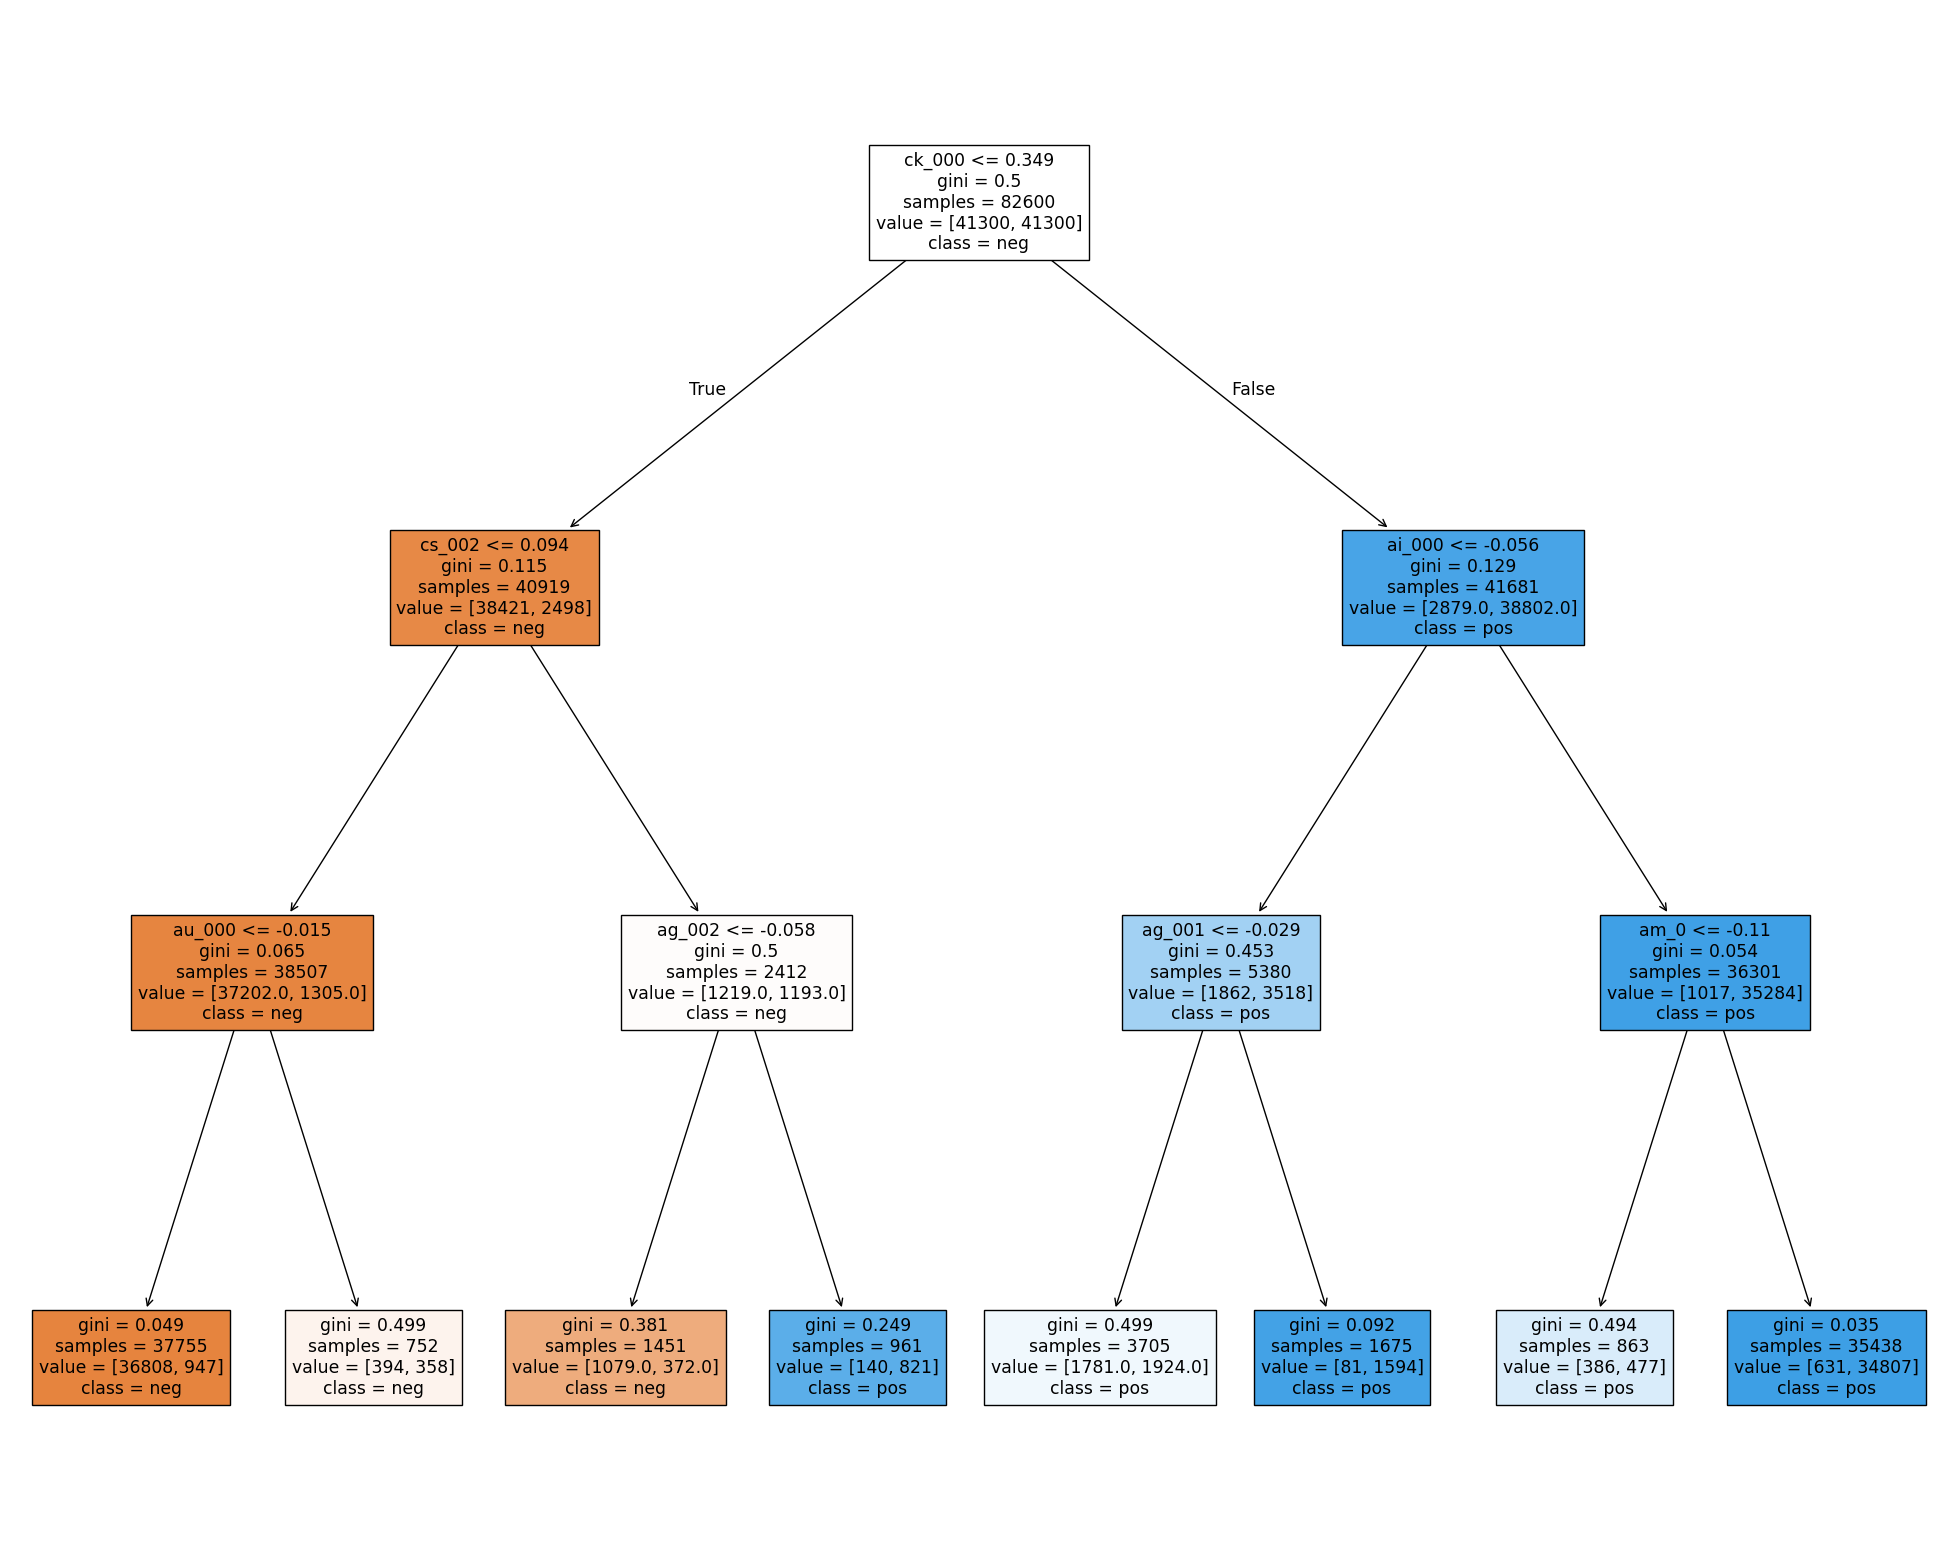

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Model_DT,
                   feature_names=data.columns,
                   class_names=["neg", "pos"],
                   filled=True)

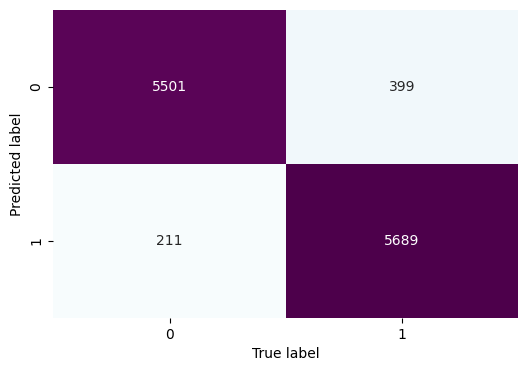

In [31]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

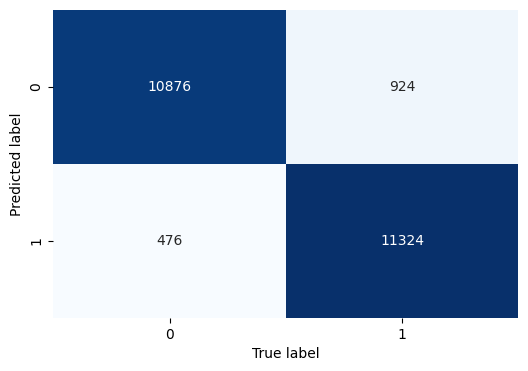

In [32]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

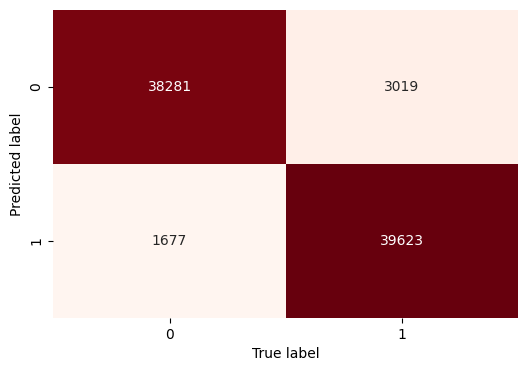

In [33]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
Model_Logistic = LogisticRegression(max_iter=2500, C=0.01, class_weight='balanced') # penalty is l2 by default

In [36]:
Model_Logistic.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=2500)

In [37]:
x_train_pred2 = Model_Logistic.predict(X_train)
x_train_pred2

array(['pos', 'pos', 'neg', ..., 'pos', 'pos', 'neg'], dtype=object)

In [38]:
x_val_predict2 = Model_Logistic.predict(x_val)
x_val_predict2

array(['pos', 'neg', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [39]:
x_test_predict2 = Model_Logistic.predict(x_test)
x_test_predict2

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [40]:
# Test report
print(classification_report(x_test_predict2, y_test))

              precision    recall  f1-score   support

         neg       0.97      0.95      0.96     12155
         pos       0.94      0.97      0.96     11445

    accuracy                           0.96     23600
   macro avg       0.96      0.96      0.96     23600
weighted avg       0.96      0.96      0.96     23600



In [41]:
# Train report
print(classification_report(x_train_pred2, Y_train))

              precision    recall  f1-score   support

         neg       0.98      0.95      0.96     42651
         pos       0.95      0.98      0.96     39949

    accuracy                           0.96     82600
   macro avg       0.96      0.96      0.96     82600
weighted avg       0.96      0.96      0.96     82600



In [42]:
# Validation report
print(classification_report(x_val_predict2, y_val))

              precision    recall  f1-score   support

         neg       0.98      0.95      0.96      6076
         pos       0.95      0.98      0.96      5724

    accuracy                           0.96     11800
   macro avg       0.96      0.96      0.96     11800
weighted avg       0.96      0.96      0.96     11800



In [43]:
print("Training Accuracy: ", Model_Logistic.score(X_train, Y_train))
print("Validation Accuracy: ", Model_Logistic.score(x_val, y_val))
print("Testing Accuracy: ", Model_Logistic.score(x_test, y_test))

Training Accuracy:  0.9615133171912833
Validation Accuracy:  0.961864406779661
Testing Accuracy:  0.9589406779661017


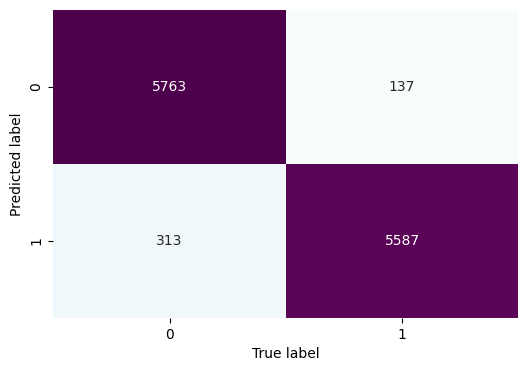

In [44]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

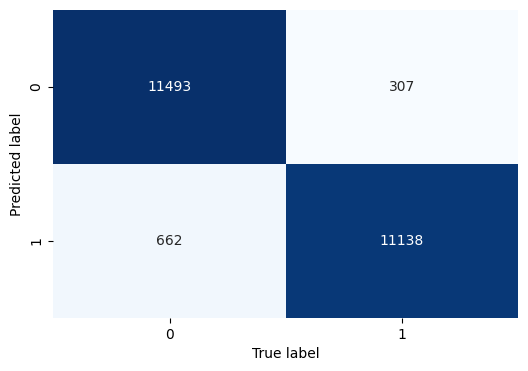

In [45]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

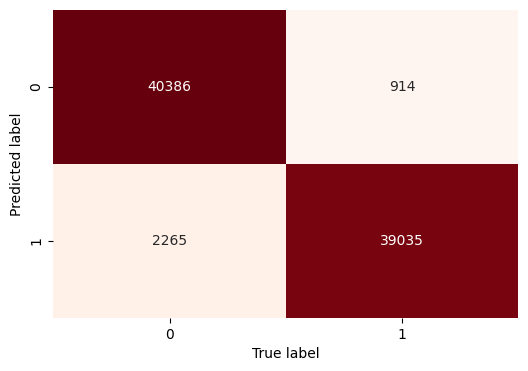

In [46]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

In [47]:
from sklearn.svm import SVC

In [48]:
Model_SVC = SVC(kernel='poly', degree=2, C=1, coef0=1, class_weight='balanced')

In [49]:
Model_SVC.fit(X_train, Y_train)

SVC(C=1, class_weight='balanced', coef0=1, degree=2, kernel='poly')

In [50]:
x_train_pred3 = Model_SVC.predict(X_train)
x_train_pred3

array(['pos', 'pos', 'neg', ..., 'pos', 'pos', 'neg'], dtype=object)

In [51]:
x_val_predict3 = Model_SVC.predict(x_val)
x_val_predict3

array(['pos', 'neg', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [52]:
x_test_predict3 = Model_SVC.predict(x_test)
x_test_predict3

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [53]:
# Test report
print(classification_report(x_test_predict3, y_test))

              precision    recall  f1-score   support

         neg       0.98      0.95      0.97     12128
         pos       0.95      0.98      0.97     11472

    accuracy                           0.97     23600
   macro avg       0.97      0.97      0.97     23600
weighted avg       0.97      0.97      0.97     23600



In [54]:
# Train report
print(classification_report(x_train_pred3, Y_train))

              precision    recall  f1-score   support

         neg       0.98      0.96      0.97     42535
         pos       0.95      0.98      0.97     40065

    accuracy                           0.97     82600
   macro avg       0.97      0.97      0.97     82600
weighted avg       0.97      0.97      0.97     82600



In [55]:
# Validation report
print(classification_report(x_val_predict3, y_val))

              precision    recall  f1-score   support

         neg       0.98      0.96      0.97      6050
         pos       0.96      0.98      0.97      5750

    accuracy                           0.97     11800
   macro avg       0.97      0.97      0.97     11800
weighted avg       0.97      0.97      0.97     11800



In [56]:
print("Training Accuracy: ", Model_SVC.score(X_train, Y_train))
print("Validation Accuracy: ", Model_SVC.score(x_val, y_val))
print("Testing Accuracy: ", Model_SVC.score(x_test, y_test))

Training Accuracy:  0.9691404358353511
Validation Accuracy:  0.97
Testing Accuracy:  0.9666101694915255


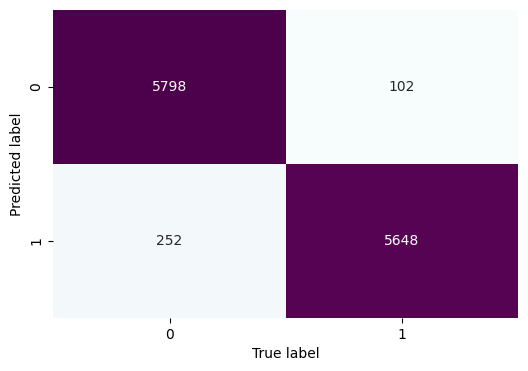

In [57]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

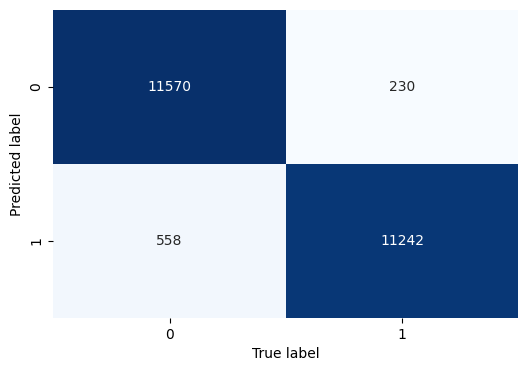

In [58]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

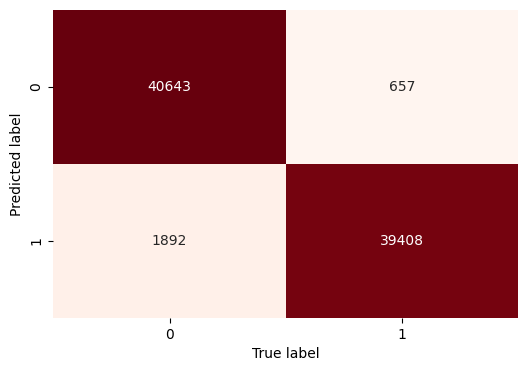

In [59]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Hacked Classifiers: Macro Avg F1 

| Classifier            |  | Train | Test | Validation |
|----------------------|----------------|-------|------|------------|
| Decision Tree        |                | 0.94  | 0.94 | 0.95       |
| Logistic Regression   |                | 0.96  | 0.96 | 0.96       |
| SVC                  |                | 0.97  | 0.97 | 0.97       |


In the Hacked classifiers to handle the class imbalance, over sampling of the minority class is done using SMOTE and class weights is set to be balanced.

SMOTE generates synthetic data thereby populating the minority class. Class weights assign weights to each class by calculating weights inversely proportional to class frequencies. Sample weights is taken care of inherently as after oversampling the class proportions would be equal i.e., each would have same number of samples. Sample weights are particulary useful when we want to penalize when the model misclassifies some important datapoints.

All the three models are able to generalize better and provide equal attention to both the classes(pos and neg). The model's metrics such as precision, f1 and recall for both the classes have increased significantly compared to the baseline classifiers metrics indicating it's generalization ability. 

The accuracy of the models compared to baseline classifers have decreased as it would be expected, since the baseline classifers were biased towards one class and neglecting the other class. The hacked classifier models are dealing with class of equal sample size along with the class weights being set it's able to capture properties of both class and it's attempting to reduce the number of misclassifications of both the classes. The number of misclassifications by the hacked models is quite small compared to the each class sample size.